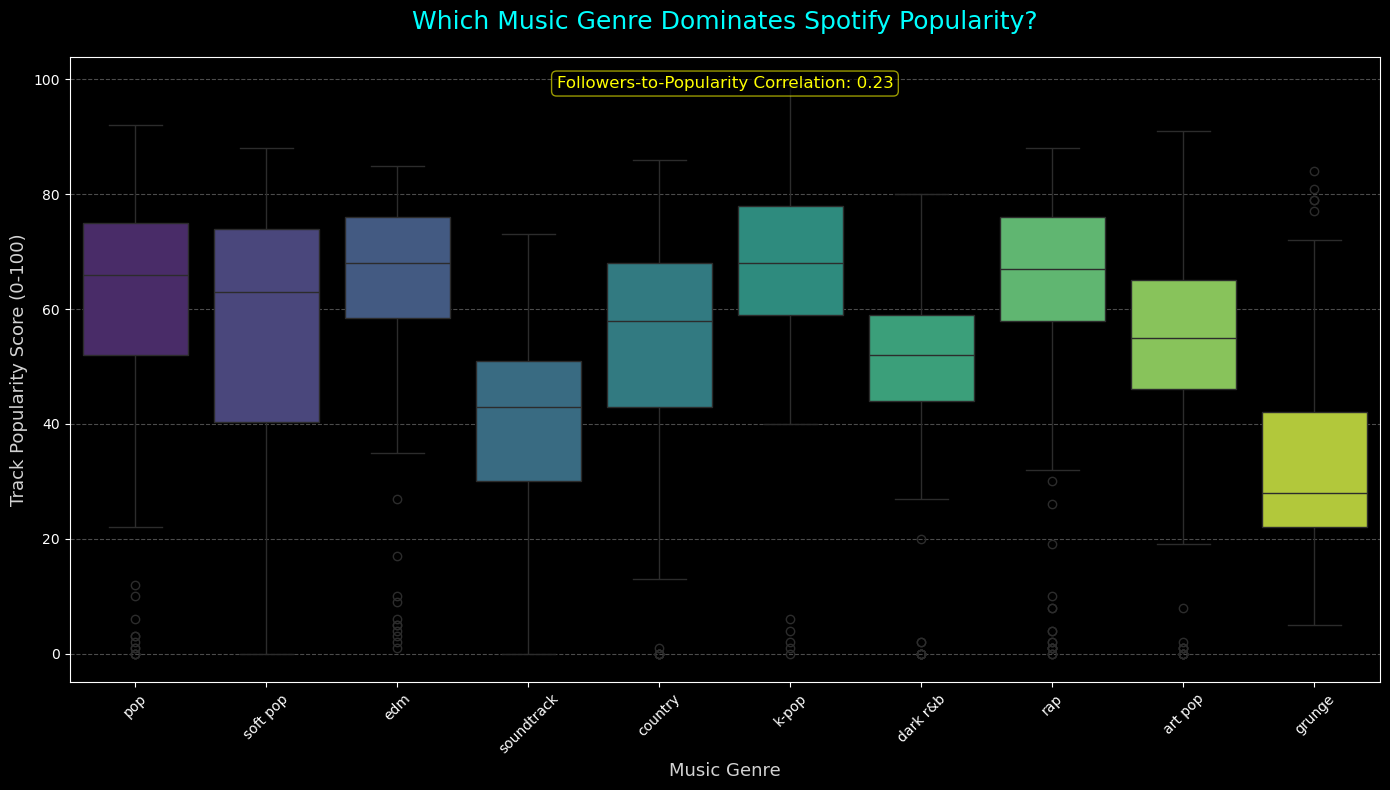

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')
plt.figure(figsize=(14, 8))

df = pd.read_csv('track_data_final.csv')

df['primary_genre'] = df['artist_genres'].apply(lambda x: eval(x)[0] if pd.notnull(x) and '[' in x and len(eval(x)) > 0 else 'Unknown')

top_10_genres = df[df['primary_genre'] != 'Unknown']['primary_genre'].value_counts().head(10).index
df_top_genres = df[df['primary_genre'].isin(top_10_genres)]

sns.boxplot(data=df_top_genres, x='primary_genre', y='track_popularity', 
            palette='viridis', hue='primary_genre', legend=False)

plt.title('Which Music Genre Dominates Spotify Popularity?', fontsize=18, color='cyan', pad=20)
plt.xlabel('Music Genre', fontsize=13, color='lightgray')
plt.ylabel('Track Popularity Score (0-100)', fontsize=13, color='lightgray')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)

correlation = df['artist_followers'].corr(df['track_popularity'])
plt.annotate(f'Followers-to-Popularity Correlation: {correlation:.2f}', 
             xy=(0.5, 0.95), xycoords='axes fraction', 
             ha='center', fontsize=12, color='yellow', 
             bbox=dict(boxstyle="round", fc="black", ec="yellow", alpha=0.6))

plt.tight_layout()
plt.show()